# ELM368 ÖDEV#4
## Adı Soyadı : Mahmut Safa BULAT
## Öğrenci No: 141024051

### Kütüphaneleri ekleme

In [1]:
import numpy as np                      
#mat. fonksiyonlarını kullanabilmek için gereken kütüphane.
import cmath as c                       
#complex sayılar için başka bir mat. kütüphanesi.
from matplotlib import pyplot as plt    
#plot (grafik çizdirme) fonksiyonlarını kullanmakak için gereken kütüphane.
import zplane 
#z-planede ROC çizdirmemiz için gereken kütüphane
from scipy import signal
#spicy kütüphanesini ekliyoruz
%matplotlib notebook
#düzgün grafik görüntülemek için gerekiyor.

from numpy import pi as pi              
#pi sayısını direkt pi olarak kullanmak için.

import warnings
warnings.simplefilter("ignore", np.ComplexWarning) 
#complex sayı hatalarını almamak için. ***
#*** bu işlem sonuçları etkilememektedir.

## SORU 1)

#### Aşağıda bir DZD sistem fark denklemi olarak verilmiştir. Buna göre, aşağıdaki soruları cevaplayınız:

#### 𝑦[𝑛]=12𝑦[𝑛−1]−4𝑦[𝑛−2]+2𝑦[𝑛−3]+𝑥[𝑛]+23𝑥[𝑛−1]+19𝑥[𝑛−2] 

##### a) Sistem fonksiyonu 𝐻 (𝑧)′𝑦𝑖 el ile hesaplayınız.


Sistem fonksiyonu H(z)'yi bulmak için verilen fark denkleminin z-dönüşümü'nü alırsak: $\\ $

Y(Z)=(1/2*Z^-1)Y(Z)-(4*Z^-2)Y(Z)+(2*Z^-3)Y(Z)+X(Z)+(2/3*Z^-1)X(Z)+(1/9*Z^-2)X(Z) $\\ $
Y(z) ve X(Z) parantezlerine alırsak: 
    Y(Z)(1-1/2Z^-1 + 4Z^-2 - 2Z^-3)=X(Z)(1+2/3Z^-1 + 1/9Z^-2)  $\\ $
Y(Z)=X(Z)H(Z) olduğunu biliyoruz. Bu eşitliği düzenlersek H(Z)=Y(Z)/X(Z) elde ederiz. Elde ettiğimiz denklemi düzenlersek:$\\ $

 H(Z)=Y(Z)/X(Z) = $(1+2/3Z^-1 + 1/9Z^-2)$$/$$(1-1/2Z^-1 + 4Z^-2 - 2Z^-3)$ bulunur.$\\ $ Bu denklemi çarpanlarına ayırırsak; $\\ $
 H(Z)= (1+ 1/3Z^-1)(1+ 1/3Z^-1)/(1+4Z^-2)(1-1/2Z^-1) $\\ $
 H(Z)= (1+ 1/3Z^-1)(1+ 1/3Z^-1)/(1+j2Z^-1)(1-j2Z^-1)(1-1/2Z^-1) elde etmiş oluruz.  $\\ $
Bu şekilde işlemlerimizi daha rahat bir şekilde gerçekleştireceğiz.$\\ $

##### b) Sistemin kutup-sıfır diyagramını Python ile çiziniz.


<IPython.core.display.Javascript object>


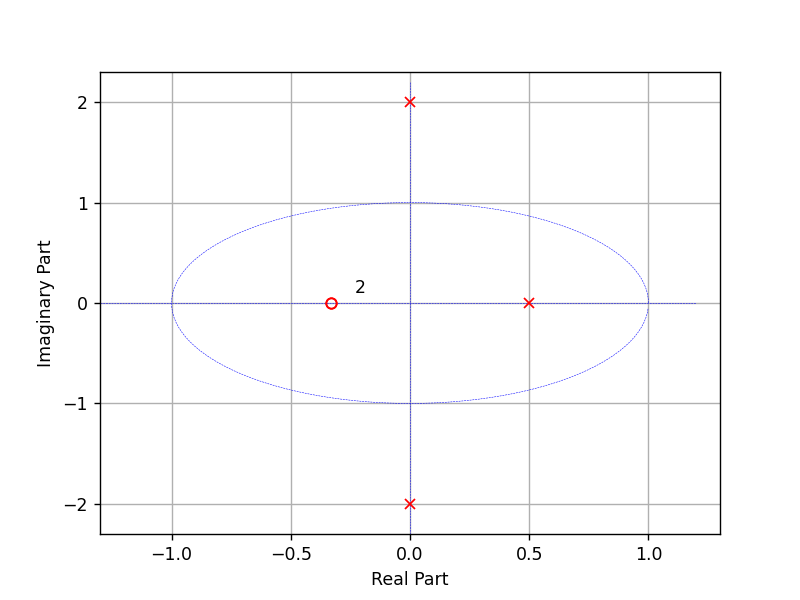

In [2]:
#yukarıda bulduğumuz işaretin sıfırlarını ve kutuplarını yazalım;

#verilen sinyalin sıfırlarının yazılması
zeross=np.array([-1/3,-1/3]);      #el yordamıyla elde ettiğimiz sıfırları girelim
#verilen sinyalin kutuplarının yazılması
poless = np.array([-2j,2j,1/2]);   #el yordamıyla elde ettiğimiz kutupları girelim
k=1;
#kutup ve sıfırların transfer fonksiyonuyla sistemi oluşturması
b, a=signal.zpk2tf(zeross,poless,k);
#sistemin kutup sıfır diyagramı
zplane.zplane(b,a);

##### c) ROC bölgesini şu iki durum için ayrı ayrı belirleyiniz:
c.1. eğer ℎ[𝑛] = 0, 𝑛 < 0 . $\\   $
c.2. eğer sistemin Fourier dönüşümü varsa.

c.1.durum: h[n]=0 ve n<0 için; Sistem nedensel olur. $\\ $ Nedensel sistemler sağ yanlı sağ yanlı dizilerdir.
ROC bölgesinin içinde kutup bulunmaması gerekir. Dolayısıyla sistemin nedensel/sağ yanlı olması için en dış kutbu ROC bölgesi seçmemiz gerekir bu durumda içinde kutup bulunmayacaktır.$\\ $ 
Bulduğumuz kutup-sıfır diyagramı üzerinde bu koşulun sağlanması için; ROC: |z|>2j olması gerekir.

c.2.durum: sistemin Fourier dönüşümü varsa; sistem kararlıdır (veya kararlı olabilir).$\\ $
Sistemin Fourier dönüşümü varsa ROC birim çemberi içermelidir. Bu koşul sağlanırsa sistemimiz kararlıdır diyebiliriz.$\\ $ Bulduğumuz kutup-sıfır diyagramı üzerinde bu koşulun sağlanması için ROC: |z|>1/2 olması gerekir. Fakat ROC bölgesinin içinde kutup bulunduramayacağı için dolayısıyla aynı zamanda |z|<2j den küçük olmalıdır.$\\ $
Yukarıdaki tüm koşulları düşünürsek;$\\ $ ROC: 1/2<|z|<2j olması gerekir.

##### d) Sistemin dürtü cevabını (c.1) durumu için bulunuz. 

Dürtü cevabını 𝑛=0,1,2,…,30 için çizdiriniz ve sistemin kararlılığını yorumlayınız. (Bahsi geçen ters dönüşüm yöntemlerinden herhangi birini kullanabilirsiniz.)

c.1 durumunun sağlanması için gereken koşulları yukarıda yazdık yani sistemimizin sağ yanlı olduğunu ve ROC: |z|>2j olması gerektiğini bulmuştuk.

<IPython.core.display.Javascript object>


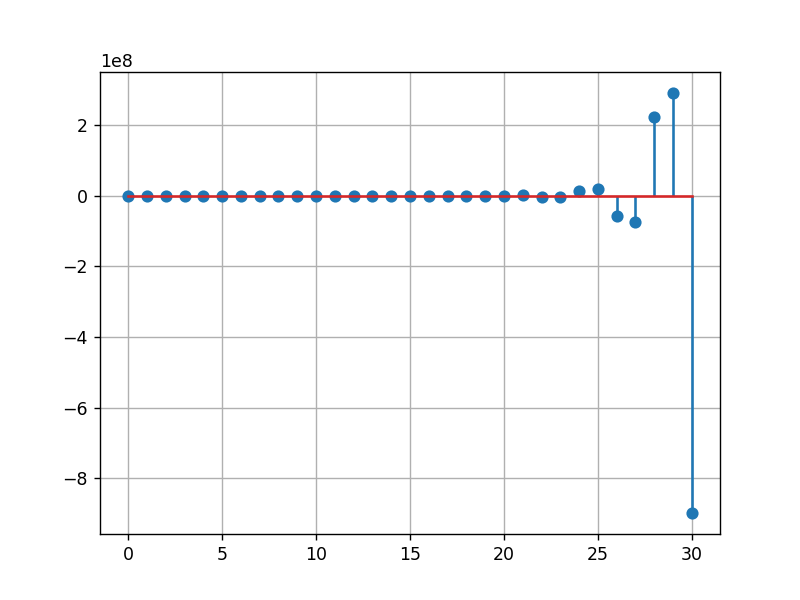

In [3]:
#kuvvet serisi yöntemiyle yapalım.

num=np.array([1, 2.0/3, 1.0/9, 0]);             #el yordamıyla elde ettiğimiz katsayıları girelim
denum=np.array([1, -1.0/2, 4.0, -2.0]);
n, x=signal.dimpulse((num, denum,1),x0=0,n=31); # n: 0...30 arasında serimizi oluşturalım

plt.figure(104);
plt.stem(n,np.squeeze(x),use_line_collection=True);
plt.grid();

Çizdirdiğimiz dürtü cevabından yola çıkarak görüyoruz ki sistem nedensel fakat kararlı değil çünkü genlik anlamında sonsuza doğru gidiyor...

##### e) Bu sistem aynı anda hem kararlı hem de nedensel olabilir mi? Açıklayınız. 
Eğer cevabınız hayır ise, bu sistemi hem kararlı hem de nedensel yapabilmek için nasıl bir işlem uygulanmalıdır, matematiksel olarak gösteriniz.

Bu sistem aynı anda hem kararlı hem de nedensel $olamaz$.$\\ $
Bunun nedenini c'kısmında c.1 ve c.2 durumlarını incelerken belirttik;$\\ $

Kısaca özetleyecek olursak; Bu sistemin nedensel olması için ROC: |z|>2j ve kararlı olabilmesi için  1/2<|z|<2j olması gerekir. Bu gereklilikleri yerine getirecek ortak bir ROC yoktur ve bu yüzden cevabımız $olamaz$ şeklinde oluyor. 
$\\ $
Sistemimizin hem kararlı hem nedensel olması demek birim çemberi içermeli ve sağ yanlı olmalıdır.
$\\ $
Bu koşuşu sağlayabilecek ROC ise ROC: |z|>1/2 tir.

ROC içinde kutup içeremeyeceğinden dolayı ROC:|z|>1/2 koşulunun sağlanması için 2j ve -2j kutuplarının $olmaması$ gerekir. Bu sistemi bu şekilde düzenlemek istersek sistem fonksiyonumuzun paydasındaki (1+4Z^-2) kısmını elememiz gerekmektedir;$\\ $

H(Z) değerimizi (1+4z^-2) ile çarparsak komplex kutuplardan kurtulmuş oluruz ve yeni bulduğumuz sistem fonksiyonumuz;$\\ $
H(Z)'=(1+1/3z^-1)(1+1/3z^-1)/(1-1/2z^-1) şeklinde olur.
Gördüğümüz gibi bu sistem ROC:|z|>1/2 olduğunda istenilen hem kararlı hem de nedensel durumunu sağlar.

##### f) Bir önceki (e) şıkkında bulduğunuz sistemin kutup-sıfır diyagramı ve dürtü cevabını bulunuz ve çizdiriniz
(OnCalismaOrnek10.ipynb’daki lfilter() fonksiyonunu kullanıp, giriş işaretini de dürtü olarak tanımlayabilirsiniz). $\\  $
Sistemin kutup konumlarının dürtü cevabı üzerindeki etkisini gözleyiniz. Kutupların birim çembere göre konumu, reel ve imajiner eksenlerde bulunduğu bölge vb. göz önünde bulundurarak gözlemlerinizi raporlayınız.

<IPython.core.display.Javascript object>


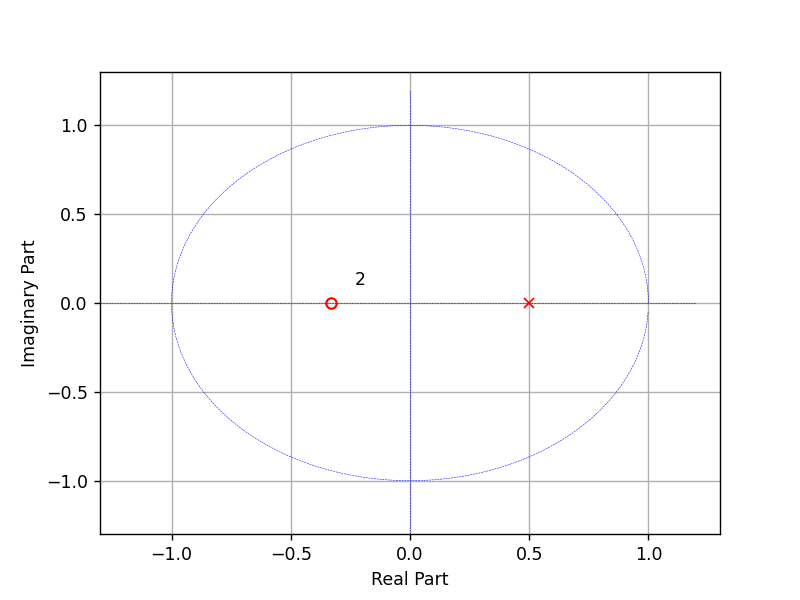

In [4]:
#yukarıda bulduğumuz yeni işaretin sıfırlarını ve kutuplarını yazalım;

#verilen sinyalin sıfırlarının yazılması
zeross=np.array([-1/3,-1/3]);      #el yordamıyla elde ettiğimiz sıfırları girelim
#verilen sinyalin kutuplarının yazılması
poless = np.array([1/2]);          #el yordamıyla elde ettiğimiz kutupları girelim
k=1;
#kutup ve sıfırların transfer fonksiyonuyla sistemi oluşturması
b, a=signal.zpk2tf(zeross,poless,k);
#sistemin kutup sıfır diyagramı
zplane.zplane(b,a);

Kutup-sıfır diyagramında görüldüğü gibi imajiner eksendeki kutupları yok ettik. $\\ $
Eğer sistemimizinde sağ yanlı olmuşsa nedensellik sağlanmış olur;$\\ $
Sağ yanlı olması durumunda, reel kısımdaki 1/2 kutbumuzun dışındaki alanların taranması gerekir. $\\ $
Kutubumuz 1 den küçük olduğu için, ROC'umuz birim çemberi içeriyor. $\\ $
Birim çemberi içermiş olması fourier dönüşümünün olduğu ve kararlı olduğu göstergesidir. $\\ $
Dürtümüzü çizdirecek olursak;

<IPython.core.display.Javascript object>


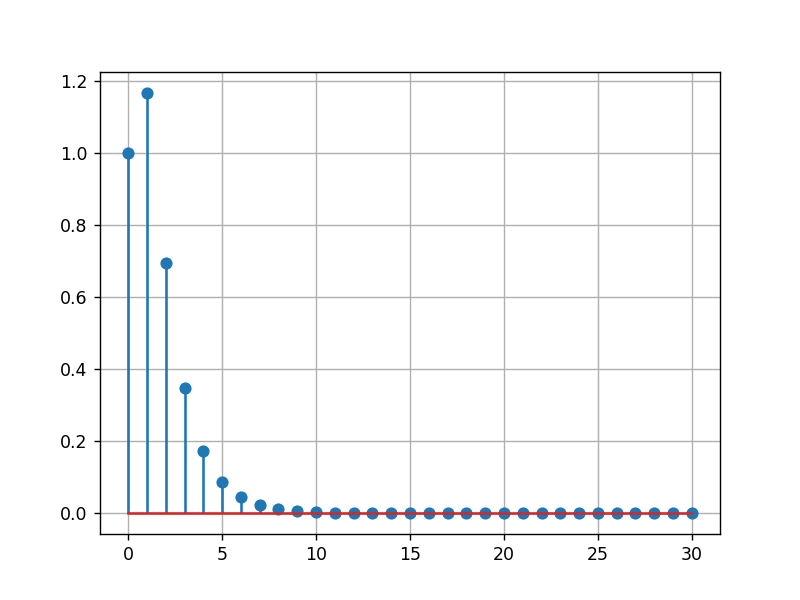

In [5]:
#kuvvet serisi yöntemiyle yapalım.

num=np.array([1, 2.0/3, 1.0/9, 0]);             #el yordamıyla elde ettiğimiz katsayıları girelim
denum=np.array([1, -1.0/2, 0, 0]);

n, x=signal.dimpulse((num, denum,1),x0=0,n=31); # n: 0...30 arasında serimizi oluşturalım

plt.figure(106);
plt.stem(n,np.squeeze(x),use_line_collection=True);
plt.grid();

Grafikten gördüğümüz üzere, sistemimiz artık genlik anlamında sınırlı bir işaret üretir, buradan da kararlı olduğunu söyleyebiliriz, ayrıca işaretimiz sağ yanlı olduğu için nedensel olduğu da bellidir.$\\ $

## SORU 2)

#### Nedensel bir DZD sistemin sistem fonksiyonu $𝐻(𝑧)=𝑧^2/(𝑧+1)(𝑧−1)^2$ olarak verilmektedir.

I. Dürtü cevabını önce el ile bulunuz. $\\ $
II. Daha sonra ise Örnek 7 ve Örnek 8’de gösterildiği gibi iki farklı yöntemle bu sistemin dürtü cevabını bulunuz ve çizdiriniz. $\\ $ III. Ve Örnek 9’da gösterildiği gibi sonuçları karşılaştırınız. $\\ $
IV. Elde ettiğiniz bu sonuçlar birbiri ile örtüşüyor mu? El ile bulduğunuz sonuç ile de ayrıca karşılaştırınız.

Sistem nedensel verildiği için serimiz sağ yanlıdır. Dürtü cevabı h[n], H(z)'nin ters z dönüşümü alınmış halidir. 
Bu dönüşümü kolayca alabilmek için H(z)'yi partial fraction expansion mehtoduyla ayıralım. $\\ $

H(z) = A/(z+1) + B/(z-1)^2 deriz.

A = H(z)(z+1)   |   z<-(-1) = (z^2)/(z-1)^2           => A = 1/4 olur.
B = H(z)(z-1)   |   z<-(+1) = (z^2)/(z+1)             => C = 1/2 olur.
C'yi bulurken kullandığımız ifadenin z'ye göre türevini alırsak;
B = H(z)(z-1)^2 |   z<-(+1) = 2z(z+1)-z^2 / (z+1)^2   => B = 3/4 olur.

H(z) = 1/(4*(z+1)) + 1/(2*(z-1)) + 3/(4*(z-1)^2) bulunur. Buradan ters z dönüşümü alırsak;

h[n] = 1/4(-1)^(n-1)*u[n-1] + 1/2 *u[n-1] + 3/4*n*u[n-1] olur.

<IPython.core.display.Javascript object>


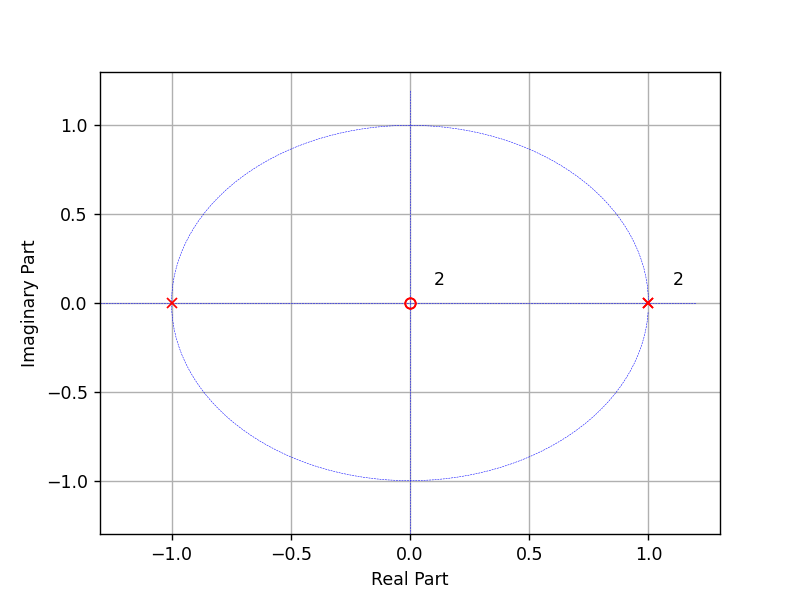

r      :  [0.25 0.75 0.5 ]
p      :  [-1.  1.  1.]
roots* :  [-1.          0.99999999  1.00000001]


In [6]:
# 𝐻(𝑧)=𝑧^2/(𝑧+1)(𝑧−1)^2 için,
# Örnek 7'de verildiği gibi dürtü cevabını bulalım.

#verilen sinyalin sıfırlarının yazılması
zeross=np.array([0,0]);      #el yordamıyla elde ettiğimiz sıfırları girelim
#verilen sinyalin kutuplarının yazılması
poless = np.array([-1,1,1]);   #el yordamıyla elde ettiğimiz kutupları girelim
#kutup ve sıfırların transfer fonksiyonuyla sistemi oluşturması
b, a=signal.zpk2tf(zeross,poless,1);
#sistemin kutup-sıfır diyagramı
zplane.zplane(b,a);

r, p, k = signal.residue(b,a);   # föyde anlatıldığı gibi istediğimiz katsayıları oluşturalım.

print('r      : ',r);           # katsayıları yazdıralım.
print('p      : ',p);           # kutupları yazdıralım.
print('roots* : ',np.roots(a)); # föy örneğindeki gibi kutupları
                                # buradan da yazdırabiliyoruz.

Yukarıdan gördüğümüz gibi tüm katsayılar beklediğimiz gibi gelmiştir.
Yukarıdaki bilgiler ile föyde anlatıldığı gibi H(z) ve h[n]'i oluşturalım;

X(z) = $r[0] / 1-p[0]z^-1$ + ... şeklinde verilmiş. Buradan;

H(z) = $(0.25)/(1+z) + (0.75)/(1-z) + (0.50)/(1-z)^2$ buluruz. Buradan h[n];

h[n] =  (0.25)*(-1)^(n-1) * u[n-1] + (0.75)*(+1)^(n-1) * u[n-1] + (0.50)*(+1)^(n-1) * u[n-1] * (n-1)  buluruz.

El ile bulduğumuzla aynı çıktı. h[n]'i çizdirelim.

<IPython.core.display.Javascript object>


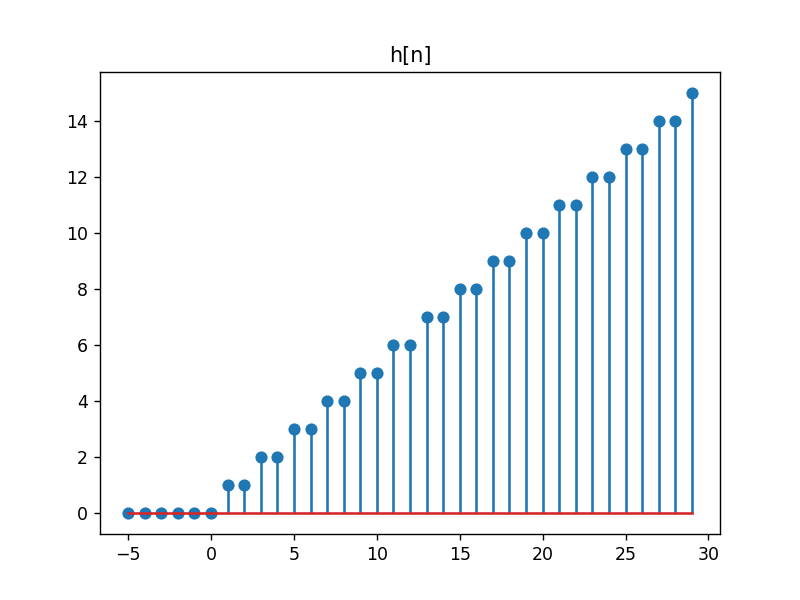

In [7]:
def u(n):                      # u[n]'i oluşturduk.    
    if n >= 0:
        return 1;
    else:
        return 0;
    
n=np.arange(-5,30);                # n domainimizi oluşturduk. 
h_ = [];

for i in range(-5,30):             # h işaretimizi doldurduk. 
    h = (0.25)*((-1)**(i-1))*u(i-1) + (0.75)*u(i-1) + (0.50)*u(i-1)*(i-1);
    h_.append(h);
    
plt.figure(202);
plt.stem(range(-5,30),h_);
plt.title('h[n]');
plt.show();
    

<IPython.core.display.Javascript object>


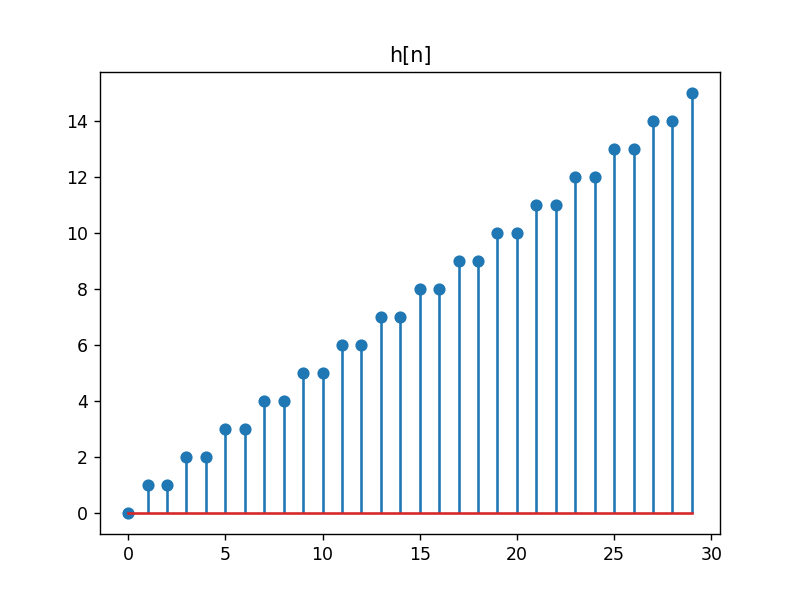

In [8]:
# 𝐻(𝑧)=𝑧^2/(𝑧+1)(𝑧−1)^2 için,
# Örnek 8'de verildiği gibi dürtü cevabını bulalım.

num = np.array([1,0,0]); # we add zeros to match the size of num and
denum = np.array([1, -1, -1, 1]); # coeffs of denum
n, x = signal.dimpulse((num, denum, 1),x0=0, n=30);

plt.figure(220);
plt.title('h[n]');
plt.stem(n, np.squeeze(x));
plt.show()

Örnek 7 ve 8'de verildiği gibi h[n]'lerimizi bulup çizdirdik ve aynı grafikleri bulduk. $\\ $
Şimdi de örnek 9'da verildiği gibi karşılaştırma yapalım.

<IPython.core.display.Javascript object>


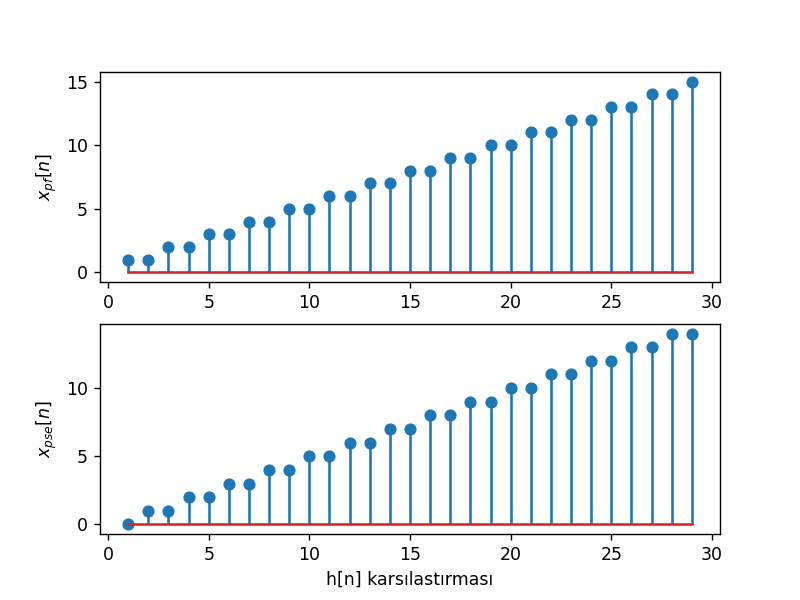

In [22]:
# 𝐻(𝑧)=𝑧^2/(𝑧+1)(𝑧−1)^2 için,
# Örnek 9'de verildiği gibi sonuçlarımızı karşılaştıralım.

n = np.arange(1,30,1);                 # define the index vector for 10 points
# result of (Ornek-7)' ile bulduğumuz h[n];
xpf = (0.25)*((-1)**(n-1)) + (0.75) + (0.50)*(n-1);       

#(0.25)*((-1)**(i-1))*u(i-1) + (0.75)*u(i-1) + (0.50)*u(i-1)*(i-1
#(0.25)/(1+𝑧)+(0.75)/(1−𝑧)+(0.50)/(1−𝑧)2
#xpf = -(1.0/4)**n + 2*(1.0/2)**n
                                        # (ornek-8) i yaptığımız şekilde num/denum tanımlayalım;
num = np.array([1, 0, 0]);              # we add zeros to match the size of num an
denum = np.array([1, -1, -1, 1]);       # coeffs of denum
n1, xpse = signal.dimpulse((num, denum, 1),x0=0, n=30-1);
xpse = np.squeeze(xpse);

plt.figure(230);
plt.subplot(2,1,1), plt.stem(n, xpf), plt.ylabel('$x_{pf}[n]$');
plt.subplot(2,1,2), plt.stem(n, xpse), plt.ylabel('$x_{pse}[n]$');
plt.xlabel('h[n] karsılastırması');

#Not: negative integer hatası aldığım için n'leri 0 değil 1 den başlattım.

Sonuçları yorumlayacak olursak, power series açılımı ve partial fraction açılımı kullanarak pyhon üzerinden dürtü işaretimizi bulduk. Grafiklerden de anlaşıldığı üzere, tüm sonuçlarımız birbiri ile örtüşüyor. El yordamı ile bulduğumuz sonuçları da n=0, n=1, ... şeklinde test ettiğimizde python ile bulduğumuz sonuçlar ile örtüştüğünü görüyoruz.


## SORU 3)

#### İkinci soruyu 𝐻(𝑧)= .... (verilen yeni H(z) ) için tekrar ediniz.

Sistem nedensel verildiği için serimiz sağ yanlıdır. Dürtü cevabı h[n], H(z)'nin ters z dönüşümü alınmış halidir. 
Bu dönüşümü kolayca alabilmek için H(z)'yi power series expansion mehtoduyla ayıralım. $\\ $

( 1+ 3*𝑧^−1 + 11/6*𝑧^−2 + 1/3*𝑧^−3 ) / ( 1+5/6𝑧^−1 + 1/6𝑧^−2 ) tam bölme işlemi yapalım;

H(z) = 1 + 13/6*z-1 - 5/36*z-2 + 19/216*z-3 - ... + ... şeklinde bulunur.
Bu bir IIR filtre olduğu için sonsuza dek devam eder. Bulduğumuz sistemin (belli bir kısma kadar) ters z dönüşümü alırsak;

h[n] = 𝛿[n] + 13/6*𝛿[n-1] - 5/36*𝛿[n-2] + 19/216*𝛿[n-3] - ... olur.

In [24]:
# 𝐻(𝑧)= ( 1+ 3*𝑧^−1 + 11/6*𝑧^−2 + 1/3*𝑧^−3 ) / ( 1+5/6𝑧^−1 + 1/6𝑧^−2 ) için,
# Örnek 7'de verildiği gibi dürtü cevabını bulalım.

# elimizde direkt katsayılar olduğu için ve tf negatif 
# seri olduğu için residuez ile H(z) bulabiliriz.

b = np.array([1, 3, 11/6, 1/3]);
a = np.array([1, 5/6, 1/6 ]);
r, p, k = signal.residuez(b, a);
print("r:", r);
print("p:", p);
print("k:", k);

r: [ 1. -1.]
p: [-0.33333333 -0.5       ]
k: [1. 2.]


Gereken z,p,k değerlerini bulduk.
Yukarıdaki bilgiler ile föyde anlatıldığı gibi H(z) ve h[n]'i oluşturalım;

X(z) = $r[0] / 1-p[0]z^-1 + k[0] ... $ şeklinde verilmiş. Buradan;


H(z) = $ 1 + 2z^-1 + (1 / 1 + 0.333z^1) +  (-1 / 1 + 0.5z^1) $ buluruz. Buradan h[n];

h[n] =  𝛿[n] + 2𝛿[n-1] + (-0.333)^n*u[n] - (-0.5)^n*u[n] buluruz.

El ile bulduğumuzla biraz farklı çıktı, h[n]'i çizdirelim ve bakalım.

<IPython.core.display.Javascript object>


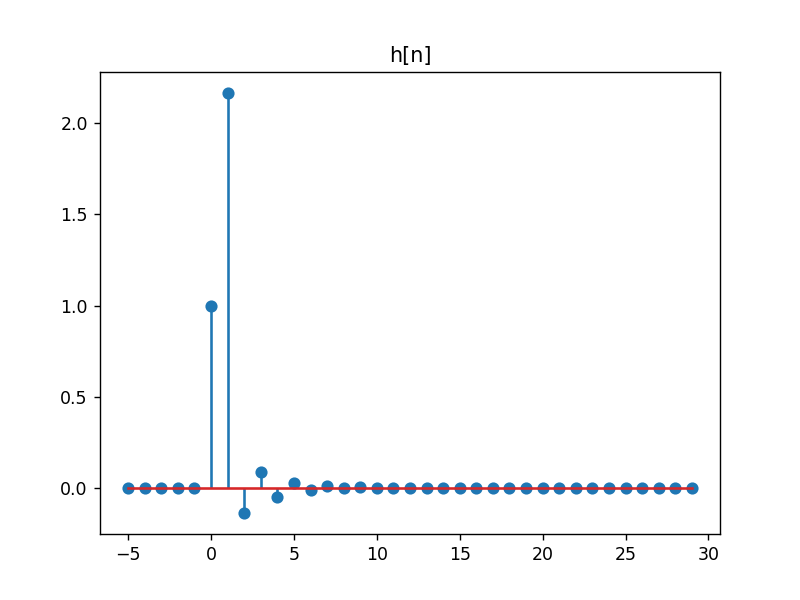

In [11]:
def u(n):                      # u[n]'i oluşturduk.    
    if n >= 0:
        return 1;
    else:
        return 0;
    
def dirac(n):                  # 𝛿[n]'i oluşturduk.
    if n == 0:
        return 1;
    else:
        return 0;
    
n=np.arange(-5,30);                # n domainimizi oluşturduk. 
h_ = [];

for i in range(-5,30):             # h işaretimizi doldurduk. 
    h = dirac(i) + 2*dirac(i-1) + ((-0.333)**i)*u(i) - ((-0.5)**i)*u(i);
    h_.append(h);
    
plt.figure(302);
plt.stem(range(-5,30),h_);
plt.title('h[n]');
plt.show();
    

El yordamı ile bulduğumuzla aynı bir h[n] elde ettik. Şimdi örnek 8 gibi yaparak farklı bir yol ile bulmayı deneyelim.

<IPython.core.display.Javascript object>


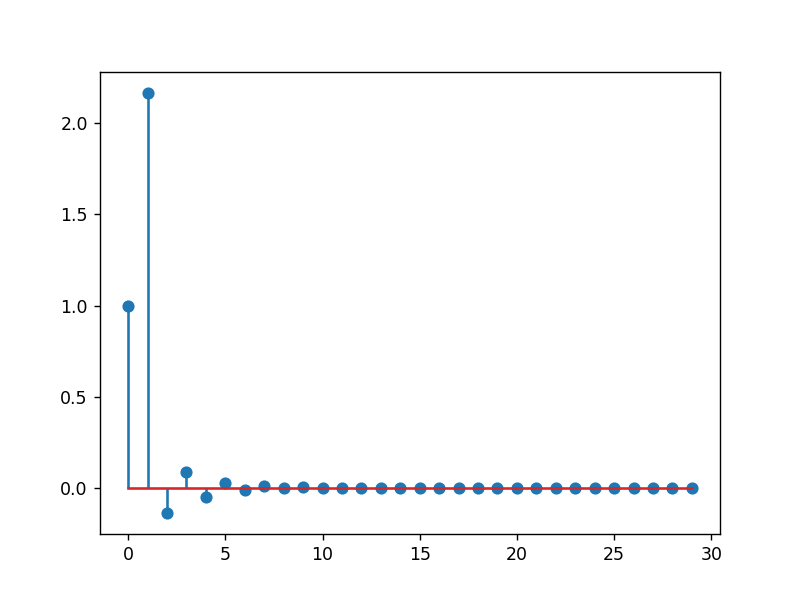

In [12]:
# 𝐻(𝑧)=𝑧^2/(𝑧+1)(𝑧−1)^2 için,
# Örnek 8'de verildiği gibi dürtü cevabını bulalım.

num = np.array([1,3,1.83333333,0.33333333]); # we add zeros to match the size of num and
denum = np.array([1, 0.83333333, 0.16666667,0]); # coeffs of denum
n, x = signal.dimpulse((num, denum, 1),x0=0, n=30);

plt.figure(320);
plt.stem(n, np.squeeze(x));

Örnek 7 ve 8'de verildiği gibi h[n]'lerimizi bulup çizdirdik ve aynı grafikleri bulduk. $\\ $
Şimdi de örnek 9'da verildiği gibi karşılaştırma yapalım.

<IPython.core.display.Javascript object>


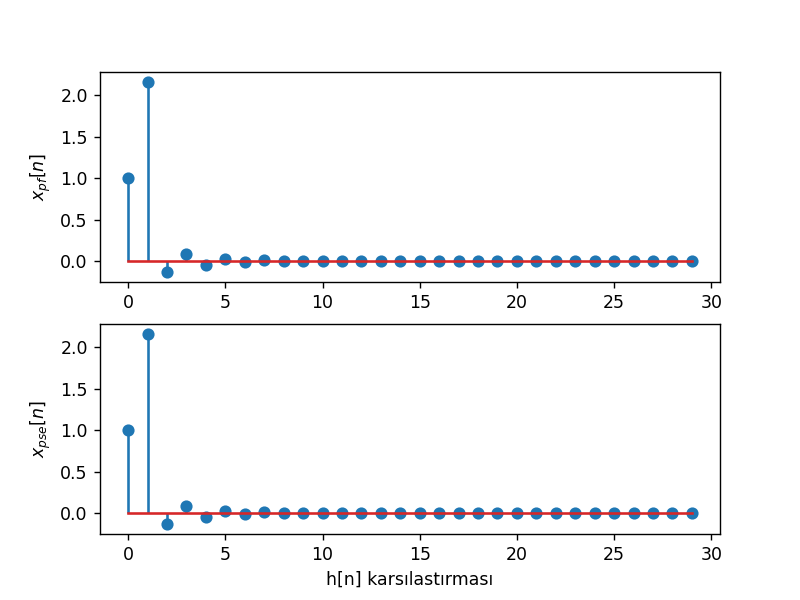

In [13]:
# 𝐻(𝑧)=𝑧^2/(𝑧+1)(𝑧−1)^2 için,
# Örnek 9'de verildiği gibi sonuçlarımızı karşılaştıralım.

n = np.arange(0,30,1);                 # define the index vector for 10 points
# result of (Ornek-7)' ile bulduğumuz h[n];
xpf = []
for i in range(0,30):             # h işaretimizi doldurduk. 
    h = dirac(i) + 2*dirac(i-1) + ((-0.333)**i)*u(i) - ((-0.5)**i)*u(i);
    xpf.append(h);

                                       # (ornek-8) i yaptığımız şekilde num/denum tanımlayalım;
num = np.array([1,3,1.83333333,0.33333333]);              # we add zeros to match the size of num an
denum = np.array([1, 0.83333333, 0.16666667,0]);       # coeffs of denum
n1, xpse = signal.dimpulse((num, denum, 1),x0=0, n=30);
xpse = np.squeeze(xpse);

plt.figure(330);
plt.subplot(2,1,1), plt.stem(n, xpf), plt.ylabel('$x_{pf}[n]$');
plt.subplot(2,1,2), plt.stem(n, xpse), plt.ylabel('$x_{pse}[n]$');
plt.xlabel('h[n] karsılastırması');

Sonuçları yorumlayacak olursak, power series açılımı ve partial fraction açılımı kullanarak pyhon üzerinden dürtü işaretimizi bulduk. Grafiklerden de anlaşıldığı üzere, tüm sonuçlarımız birbiri ile örtüşüyor. El yordamı ile power series expansionu kullanarak bulduğumuz sonuçları da n=0, n=1, ... şeklinde test ettiğimizde python ile bulduğumuz sonuçlar ile örtüştüğünü görüyoruz. Soru 2'deki gibi bu soruda da 3 farklı kaynak ile sonuçlarımızı doğrulamış ve cevaplarımızı bulmuş olduk...

## SORU 4)

#### İkinci soruyu 𝐻(𝑧)= .... (verilen yeni H(z) ) için tekrar ediniz.

Sistem nedensel verildiği için serimiz sağ yanlıdır. Dürtü cevabı h[n], H(z)'nin ters z dönüşümü alınmış halidir. 
Bu dönüşümü kolayca alabilmek için H(z)'yi partial fraction expansion mehtoduyla ayıralım. $\\ $

H(z) = a/(1-e^jpi/4*z^-1) + b/(1-e^-jpi/4*z^-1) + c/(1-0,5*z^-1) deriz;

Buradan katsayılar;

A = -1.9074357

B =  5.95371785 - j3.256194642

C =  5.95371785 + j3.256194642

olur. H(z)'yi tekrar oluşturursak ve terz z dönüşümü alırsak h[n]'i elde ederiz;

h[n] = $ (-1.907)*(0.5)^n*u[n] + (13.560)*cos(pi*n/4 - 0.5 rad) $ olur.

In [14]:
# 𝐻(𝑧)= 10(1−1*(𝑧^−1)/√2) / (1−𝑒^(𝑗𝜋/4)*𝑧^−1)(1−𝑒^−(𝑗𝜋/4)*𝑧^−1)(1−0.5*𝑧^−1) için,
# Örnek 7'de verildiği gibi dürtü cevabını bulalım.

# elimizde direkt katsayılar olduğu için ve tf negatif 
# seri olduğu için residuez ile H(z) bulabiliriz.


z = np.array([1/np.sqrt(2)]);
p = np.array([np.exp(1j*pi/4), np.exp(-1j*pi/4), 1/2 ]);
k = 10;
b, a = signal.zpk2tf(z, p, k);

r, p, k = signal.residue(b,a);   # föyde anlatıldığı gibi istediğimiz katsayıları oluşturalım.

print('r      : ',r);           # katsayıları yazdıralım.
print('p      : ',p);           # kutupları yazdıralım.
print('k      : ',k);           # 

r      :  [-3.8148714+0.j          1.9074357-6.51239283j  1.9074357+6.51239283j]
p      :  [0.5       +0.j         0.70710678+0.70710678j 0.70710678-0.70710678j]
k      :  []


Gereken z,p,k değerlerini bulduk.
Yukarıdaki bilgiler ile föyde anlatıldığı gibi H(z) ve h[n]'i oluşturalım;

X(z) = $r[0] / 1-p[0]z^-1 + k[0] ... $ şeklinde verilmiş. Buradan;


H(z) = $ (-3.814 / 1 + 0.5z^-1) +  (6.786*np.exp(-1j*1.286) / 1 - np.exp(1j*pi/4)*z^-1) + (6.786*np.exp(1j*1.286) / 1 - np.exp(-1j*pi/4)*z^-1) $ buluruz. $\\ $
Buradan h[n];

h[n] =  $(-3.814)*(-0.5)^n*u[n] + (6.786*np.exp(-1j*1.286))*(np.exp(1j*pi/4))^n*u[n] + (6.786*np.exp(1j*1.286))*(np.exp(-1j*pi/4))^n*u[n]$ buluruz.

El ile bulduğumuzdan biraz farklı çıktı, h[n]'i çizdirelim ve bakalım.

<IPython.core.display.Javascript object>


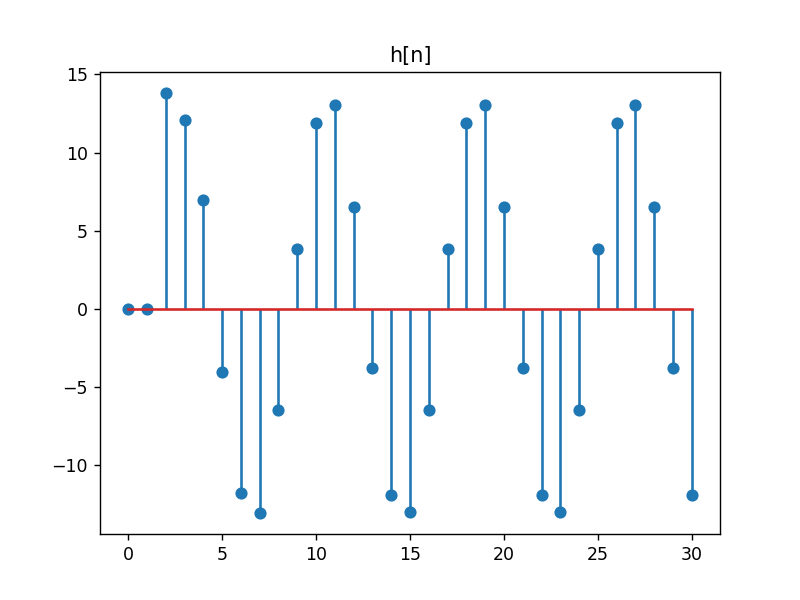

In [15]:
def u(n):                      # u[n]'i oluşturduk.    
    if n >= 0:
        return 1;
    else:
        return 0;
    
n=np.arange(0,31,1);                # n domainimizi oluşturduk. 
h_ = [];

for i in range(len(n)):           # h işaretimizi doldurduk. 
    h = (-3.814)*((-0.5)**(i-1))*u(i-1) + (6.786*np.exp(-1j*1.286))*((np.exp(1j*pi/4))**(i-1))*u(i-1) + (6.786*np.exp(1j*1.286))*((np.exp(-1j*pi/4))**(i-1))*u(i-1);
    h_.append(h);
    
plt.figure(402);
plt.stem(n,h_);
plt.title('h[n]');
plt.show();
    

<IPython.core.display.Javascript object>


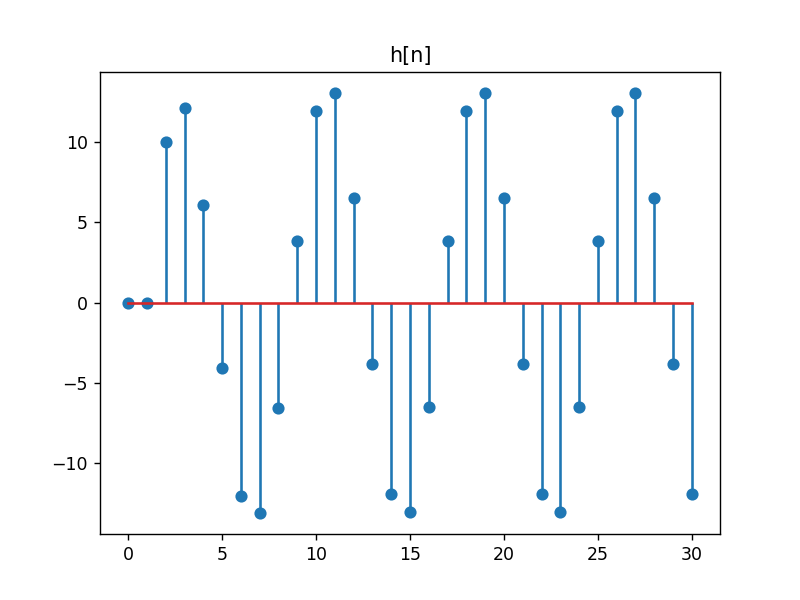

In [16]:
# 𝐻(𝑧)= 10(1−1*(𝑧^−1)/√2) / (1−𝑒^(𝑗𝜋/4)*𝑧^−1)(1−𝑒^−(𝑗𝜋/4)*𝑧^−1)(1−0.5*𝑧^−1) için,
# Örnek 8'de verildiği gibi dürtü cevabını bulalım.

num = np.array([10,-7.07106781]); # we add zeros to match the size of num and
denum = np.array([ 1,-1.91421356,1.70710678, -0.5]); # coeffs of denum
n, h = signal.dimpulse((num, denum, 1),x0=0, n=31);

plt.figure(420);
plt.title('h[n]');
plt.stem(n, np.squeeze(h));
plt.show()

Örnek 7 ve 8'de verildiği gibi h[n]'lerimizi bulup çizdirdik ve aynı grafikleri bulduk. $\\ $
Şimdi de örnek 9'da verildiği gibi karşılaştırma yapalım.

<IPython.core.display.Javascript object>


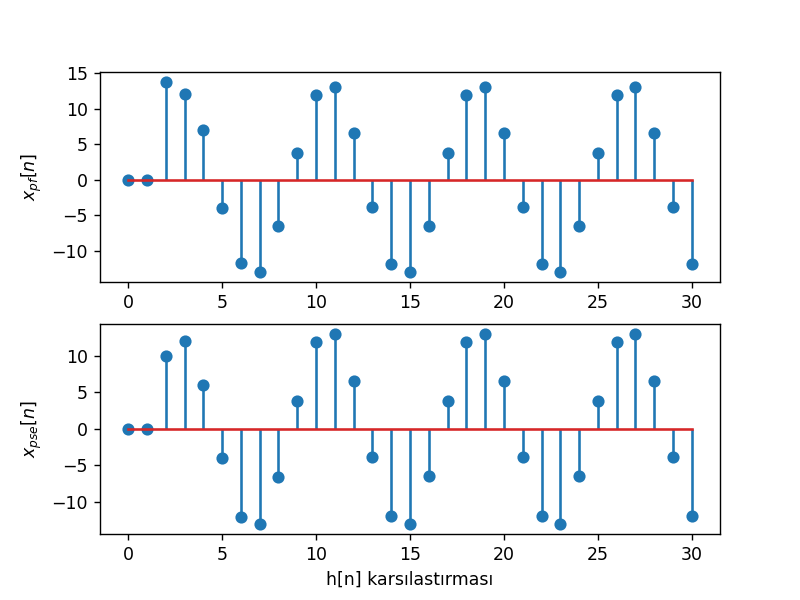

In [17]:
# 𝐻(𝑧)=𝑧^2/(𝑧+1)(𝑧−1)^2 için,
# Örnek 9'de verildiği gibi sonuçlarımızı karşılaştıralım.

n = np.arange(0,31,1);                 # define the index vector for 10 points
# result of (Ornek-7)' ile bulduğumuz h[n];
xpf = []
for i in range(len(n)):           # h işaretimizi doldurduk. 
    h = (-3.814)*((-0.5)**(i-1))*u(i-1) + (6.786*np.exp(-1j*1.286))*((np.exp(1j*pi/4))**(i-1))*u(i-1) + (6.786*np.exp(1j*1.286))*((np.exp(-1j*pi/4))**(i-1))*u(i-1);
    xpf.append(h);

                                       # (ornek-8) i yaptığımız şekilde num/denum tanımlayalım;
num = np.array([10,-7.07106781]); # we add zeros to match the size of num and
denum = np.array([ 1,-1.91421356,1.70710678, -0.5]); # coeffs of denum
n1, xpse = signal.dimpulse((num, denum, 1),x0=0, n=31);
xpse = np.squeeze(xpse);

plt.figure(430);
plt.subplot(2,1,1), plt.stem(n, xpf), plt.ylabel('$x_{pf}[n]$');
plt.subplot(2,1,2), plt.stem(n, xpse), plt.ylabel('$x_{pse}[n]$');
plt.xlabel('h[n] karsılastırması');

Sonuçları yorumlayacak olursak, power series açılımı ve partial fraction açılımı kullanarak pyhon üzerinden dürtü işaretimizi bulduk. Grafiklerden de anlaşıldığı üzere, iki farklı bulduğumuz sonuçlar neredeyse aynı, neredeyse diyorum çünkü örnek 7 ile bulduğum grafiği 1. örneği tam 10 değerinde olması gerekirken 13.6 gibi bir değere sahip, ilginç bir şekilde grafiği kalan tüm noktaları aynı değerleri gösteriyor. El yordamı ile partial fraction expansion kullanarak bulduğum sonuçlar ile örnek 8 ile bulduğum sonuçlar birbirini tutuyor ve da n=0, n=1, ... şeklinde test edip python ile karşılaştırdığımda sonuçlar ile örtüştüğünü görüyoruz. Soru 2 ve 3'deki gibi bu soruda da 3 farklı kaynak ile sonuçlarımızı doğrulamış ve cevaplarımızı bulmuş olduk...

## Ödev Sonu